# analyzing the effect of hybrid modes
Tim Tyree<br>
5.5.2021

In [1]:
from lib.my_initialization import *
import random,scipy
from lib.measure.compute_slope import *
from lib.measure.compute_sliding_slope import *
from lib.measure.powerlaw import *
%load_ext autoreload
%autoreload 2

from scipy import stats
alpha=0.1

# visualize the effect of fast diffusion versus slow diffusion for one pair of trials

232301862

In [3]:
data_dir="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_7_all.csv"
# data_dir="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/lrun_1_to_2.csv"
df=pd.read_csv(data_dir)
df.head()

,temperature_energy,set_second,reflect,r,niter,kappa,energy_gap,dt,N,L,Dt,Dratio,D,CollRate
0,1,0,0,0.1,250,216.756,-10.0,1.000000e-07,12,4.5,1.000000e-07,1,0.2,4.661781
1,1,0,0,0.1,250,216.756,-10.0,1.000000e-07,12,4.5,1.000000e-07,1,1.0,11.092322
2,1,0,0,0.1,250,216.756,-10.0,1.000000e-07,12,4.5,1.000000e-07,1,1.5,14.650011
3,1,0,0,0.1,250,216.756,-10.0,1.000000e-07,12,4.5,1.000000e-07,1,2.0,14.729000
4,1,0,0,0.1,250,216.756,-10.0,1.000000e-07,12,4.5,1.000000e-07,1,5.0,17.727977


In [46]:
#derived values
df['Dt_over_dt']=df.Dt/df.dt
# df['CollRate']=1./df['CollTime']
df['A']=df['L']**2
df['q']=df['N']/df['A'] #number of tips per square centimeter
df['w']=df['CollRate']/df['A'] #[mHz?]/cm^2

df=df[df.niter==250].copy()
#extract column values
r_values=np.array(sorted(set(df.r.values)))#cm
D_values=np.array(sorted(set(df.D.values)))#cm^2/s
L_values=np.array(sorted(set(df.L.values)))#cm
A_values=L_values**2#cm^2
kappa_values=np.array(sorted(set(df.kappa.values)))#1/s
Dt_over_dt_values=np.array(sorted(set(df.Dt_over_dt.values)))#1/s
Dratio_values=np.array(sorted(set(df.Dratio.values)))
energy_gap_values=np.array(sorted(set(df.energy_gap.values)))
temperature_energy_values=np.array(sorted(set(df.temperature_energy.values)))

In [6]:
#make test for whether there is one input parameter present in an input DataFrame1
print(r_values)
print(D_values)
print(L_values)
print(Dt_over_dt_values)
print(Dratio_values)
print(temperature_energy_values)
# print(kappa_values)
print(energy_gap_values)

[ 0.1  0.5  1.   1.5  2.   2.5  5.  10. ]
[ 0.2  1.   1.5  2.   5.  10.  20. ]
[ 4.5      5.       7.07107 10.      12.5     15.8114 ]
[1.]
[   1   10  100 1000]
[1]
[-10.   -1.    0.    0.5   1.    2.   10. ]


In [17]:
#query the DataFrame
query =(df.temperature_energy==temperature_energy_values[0])&(df.Dt_over_dt==Dt_over_dt_values[0])
query&=df.r==r_values[1]
query&=df.D==D_values[3]
query&=df.Dratio==Dratio_values[3]
query&=df.energy_gap==energy_gap_values[2]
dff=df[query]
kappa_values=np.array(sorted(set(dff.kappa.values)))
dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
# dg=dff.kappa==kappa_values[0]#Fenton-Karma fit

In [18]:
# import numpy as np
# niter=250#250 #trials per worker
# r=0.2#cm
# D=5.#cm^2/s
# A=20.25#cm^2
# # A_values=np.array([20.25,25,39,50,56.25,100,156.25,189,250])[::-1]#cm^2
# L_values=np.sqrt(A_values)#cm
# # kappa_values=np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,250,500])#1/s
# # beta_values=np.array([0.01,0.05,0.01,0.1,0.5,1])#cm
# Dt_values=np.array([1e-7])
# reflect_values=np.array([0])
# set_second_values=np.array([0])
# m_values=np.array([1.8772341309722325, 1.6375562704001745])
# M_values=np.array([5.572315674840435,16.73559858353835])
# num_trials_per_setting=6

# Dratio_values=np.array([10])#,100,1000])
# energy_gap_values=np.array(sorted([-10,10,0.,1.,-1.,]))#0.5,1,2,-1]))
# temperature_energy_values=np.array([1.])

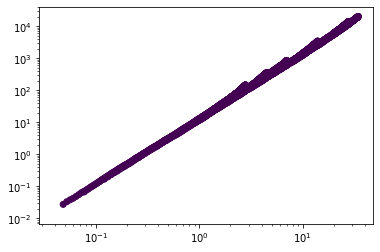

In [19]:
x_values=dg.q.values
y_values=dg.w.values
c_values=dg.kappa.values

fontsize=22
plt.scatter(x_values,y_values,c=c_values)
# plt.xlabel('N',fontsize=fontsize)
# plt.ylabel('Collision Rate',fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [32]:
#DONE: compute sliding m
#TODO: compute sliding M
xavg_values,slope_values,Rsquared_values = compute_sliding_slope_loglog(x_values,y_values,    
    x_min=1.,
    window_width=30,
    stepsize=None,
)

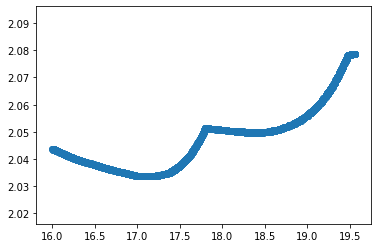

In [33]:
fontsize=22
x=xavg_values[:-1]
# y=Rsquared_values[:-1]
y=slope_values[:-1]
plt.scatter(x,y)
# plt.xlabel('N',fontsize=fontsize)
# plt.ylabel('Collision Rate',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.show()

# print powerlaw fit of trial modeling LR model for several energy gaps and several D ratios

In [59]:
def slice_df_and_print_powerlaw_fit(r,D,Dratio,energy_gap,q_min=0.1,q_max=.4):
    '''map from trial to power law fit in interval q_min to q_max'''
    #query the DataFrame
    query =(df.temperature_energy==temperature_energy_values[0])&(df.Dt_over_dt==Dt_over_dt_values[0])
    query&=df.r==r
    query&=df.D==D
    query&=df.Dratio==Dratio
    query&=df.energy_gap==energy_gap
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
    dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
    # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit

    # print(kappa_values)
    # print(energy_gap_values)
    # query=(dg.kappa==kappa_values[1])&(dg.energy_gap==energy_gap_values[3])
    # dgg=dg[query].copy()
    x_values=dg.q.values
    y_values=dg.w.values

    # q_min=0.1;q_max=.4
    # boo=(x_values>q_min)&(x_values<q_max)
    # x=np.log(x_values[boo])
    # y=np.log(y_values[boo])
    # dict_out=compute_95CI_ols(x,y)
    # dict_out

    
    boo=(x_values>q_min)&(x_values<q_max)
    x=x_values[boo]
    y=y_values[boo]
    print_fit_power_law(x,y)

In [60]:
r=r_values[1];D=D_values[3];
Dratio=Dratio_values[3];energy_gap=energy_gap_values[2]
slice_df_and_print_powerlaw_fit(r,D,Dratio,energy_gap)

m=2.008+-0.010; B=3.516+-0.019
M=B**m=12.49+-0.29 Hz*cm^{2(m-1)}
RMSE=0.0220 Hz/cm^2
R^2=0.999


In [70]:
r=r_values[1];D=D_values[3];
# for Dratio in Dratio_values:
Dratio=Dratio_values[-1]
for energy_gap in energy_gap_values[::2]:
    print(f"for r={r} cm and D_slow={D} cm^2/s fixed,")
    print(f"the powerlaw fit for D_fast={Dratio*D} cm^2/s and energy_gap={energy_gap} was")
    slice_df_and_print_powerlaw_fit(r,D,Dratio,energy_gap)
    print(f'')    

for r=0.5 cm and D_slow=2.0 cm^2/s fixed,
the powerlaw fit for D_fast=2000.0 cm^2/s and energy_gap=-10.0 was
m=2.016+-0.010; B=3.507+-0.018
M= 12.55+-0.29 Hz*cm^{2(m-1)}
RMSE=0.0216 Hz/cm^2
R^2=0.999

for r=0.5 cm and D_slow=2.0 cm^2/s fixed,
the powerlaw fit for D_fast=2000.0 cm^2/s and energy_gap=0.0 was
m=2.008+-0.010; B=3.516+-0.019
M= 12.49+-0.29 Hz*cm^{2(m-1)}
RMSE=0.0220 Hz/cm^2
R^2=0.999

for r=0.5 cm and D_slow=2.0 cm^2/s fixed,
the powerlaw fit for D_fast=2000.0 cm^2/s and energy_gap=1.0 was
m=2.018+-0.010; B=3.526+-0.018
M= 12.73+-0.29 Hz*cm^{2(m-1)}
RMSE=0.0206 Hz/cm^2
R^2=0.999

for r=0.5 cm and D_slow=2.0 cm^2/s fixed,
the powerlaw fit for D_fast=2000.0 cm^2/s and energy_gap=10.0 was
m=2.307+-0.036; B=3.258+-0.058
M= 15.25+-1.33 Hz*cm^{2(m-1)}
RMSE=0.0745 Hz/cm^2
R^2=0.991



__Result__
- increasing energy_gap increases M when energy_gap>=2 
- the exponent was approximately 2 except when energy_gap=10, wherein it was 2.3

__Result__ the slope is still superlinear overall
- DONE: make slide summarizing all this, that I tried a new data run that isn't done yet, and that preliminary results suggest it is not subquadratic.  This supports a description of particle-particle forces being necessary to describe complex electrophysiological models such as the Luo-Rudy model.
- TODO: try other examples, looking for something subquadratic
- TODO: make a nice plot showing ^this example

In [71]:
import sys

text_fn=data_dir.replace('.csv','_powerfits.txt')

original_stdout = sys.stdout # Save a reference to the original standard output

with open(text_fn, 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    #     r=r_values[1];D=D_values[3];
    for r in r_values:
        for D in D_values:
            for Dratio in Dratio_values:
                for energy_gap in energy_gap_values:
                    print(f"for r={r} cm and D_slow={D} cm^2/s fixed,")
                    print(f"the powerlaw fit for D_fast={Dratio*D} cm^2/s and energy_gap={energy_gap} was")
                    slice_df_and_print_powerlaw_fit(r,D,Dratio,energy_gap)
                    print(f'')

sys.stdout = original_stdout # Reset the standard output to its original value
print(f'output redirected to {text_fn}.')


output redirected to /home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_7_all_powerfits.txt.


__Result__
- any values exhibiting low exponent, m<1.85, also exhibited low R^2<0.75... 
- the robust exponents are still too large to support the LR model, which has m=1.544...
- if m<1.92, then R^2<0.75.
- the smallest m with reasonable R^2>0.9 all had r=5cm

# visualizing energy_gap independence

In [166]:
r_values

array([ 0.1,  0.5,  1. ,  1.5,  2. ,  2.5,  5. , 10. ])

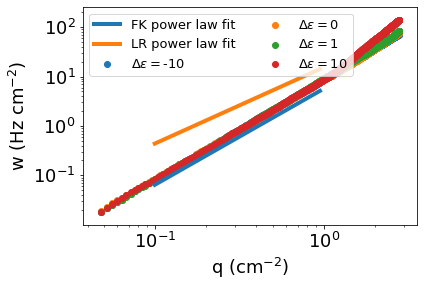

In [188]:
#plot fits for full model
m_fk=1.945;#+-0.030; B_fk=2.441+-0.051
m_lr=1.544;#+-0.034; B_lr=5.870+-0.137
M_fk=5.67;#+-0.39 Hz*cm^{2(m-1)}
M_lr=15.37;#+-1.57 Hz*cm^{2(m-1)}
# RMSE_fk=0.1252 Hz/cm^2
# RMSE_lr=0.0974 Hz/cm^2
# R^2=0.997 (FK)
# R^2=0.994 (LR)

xv=np.arange(0.1,1.,.05)
yv_fk=M_fk*(xv)**m_fk
yv_lr=M_lr*(xv)**m_lr

yscale=10**3
fontsize=18
# plt.xlim([0.1,1])
# plt.ylim([1e-1,15])
plt.yscale('log')
plt.xscale('log')
plt.plot(xv,yv_fk,label='FK power law fit',zorder=3,lw=4)
plt.plot(xv,yv_lr,label='LR power law fit',zorder=3,lw=4)

#plot data
r=5;D=2.;Dratio=1000;L=L_values[-1]
for energy_gap in energy_gap_values[::2]:
    #query the DataFrame
    query =(df.temperature_energy==temperature_energy_values[0])&(df.Dt_over_dt==Dt_over_dt_values[0])
    query&=df.r==r
    query&=df.L==L_values[-1]
    query&=df.D==D
    query&=df.Dratio==Dratio
    query&=df.energy_gap==energy_gap
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
#     dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
    dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit
    x_values=dg.q.values
    y_values=dg.w.values

    plt.scatter(x_values,y_values,label=r'$\Delta \epsilon = $'+f"{energy_gap:.0f}")#,c=c_values)

# plt.title(u'comparison to simulation\nwith two hybrid modes',fontsize=fontsize)
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-5,ncol=2,loc='upper left')
plt.show()

In [189]:
#TODO: plot m+-Delta_m versus energy gap for LR and FK model
#plot data
kappa=kappa_values[0]
# r=1.;D=5.;Dratio=1000;L=L_values[-1]
eg_lst=[];m_lst=[];Dm_lst=[];Rsq_lst=[]
for energy_gap in energy_gap_values:
    try:
        #query the DataFrame
        query =(df.temperature_energy==temperature_energy_values[0])&(df.Dt_over_dt==Dt_over_dt_values[0])
        query&=df.r==r
        query&=df.L==L_values[-1]
        query&=df.D==D
        query&=df.Dratio==Dratio
        query&=df.energy_gap==energy_gap
        dff=df[query]
        kappa_values=np.array(sorted(set(dff.kappa.values)))
        # dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
        dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit
        x_values=dg.q.values
        y_values=dg.w.values

        q_min=0.1;q_max=.4
        boo=(x_values>q_min)&(x_values<q_max)
        x=x_values[boo]
        y=y_values[boo]

        # print_fit_power_law(x,y)
        B,Delta_B,m,Delta_m,Rsq=fit_power_law(x,y)
        rmse=compute_power_rmse(x,y,m,B)
        M, Delta_M= comp_power_scale(B,Delta_B,m,Delta_m)
    #     print(f"m={m:.3f}+-{Delta_m:.3f}; B={B:.3f}+-{Delta_B:.3f}")
    #     print(f"M=B**m={M:.2f}+-{Delta_M:.2f} Hz*cm^{{2(m-1)}}")
    #     print(f"RMSE={rmse:.4f} Hz/cm^2")
    #     print(f"R^2={Rsq:.3f}")

        eg_lst.append(energy_gap)
        m_lst.append(m)
        Dm_lst.append(Delta_m)
        Rsq_lst.append(Rsq)
    except AssertionError as e:
        pass
print(Rsq_lst)

[0.9995339314200699, 0.9997594041032261, 0.999641813325951, 0.999568893388368, 0.9997771167717145, 0.9995511164883838, 0.9997151424921233]


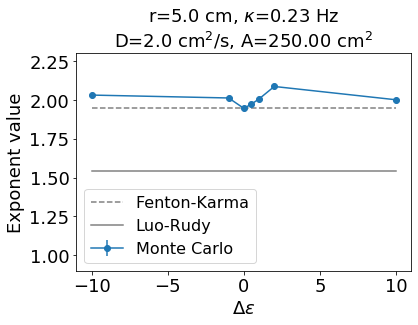

considering 0.1<q<0.4


In [190]:
m_fk=1.945#1.858;#+-0.027; B_fk=2.464+-0.030<br>
m_lr=1.544#1.638;#+-0.017; B_fk=5.588+-0.067
plt.errorbar(eg_lst, m_lst, yerr=Dm_lst, fmt='-o',label='Monte Carlo')
plt.plot(eg_lst, m_fk+0.*np.array(eg_lst), '--',c='gray',label='Fenton-Karma')
plt.plot(eg_lst, m_lr+0.*np.array(eg_lst), '-',c='gray',label='Luo-Rudy')

# plt.scatter(Dtdt_lst,m_lst,marker='^')
# plt.xscale('log')
title=f"r={r:.1f} cm, "+r"$\kappa$="+f"{kappa:.2f} Hz\nD={D} cm"+r"$^2$/s"+f", A={L**2:.2f} cm"+r"$^2$"
plt.title(title,fontsize=fontsize)
plt.xlabel(r'$\Delta \epsilon$',fontsize=fontsize)
plt.ylabel('Exponent value',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
# plt.xlim([10,50])
plt.ylim([0.9,2.3])
# plt.grid('on')
plt.legend(fontsize=fontsize-2)
plt.show()
# print("considering 20<N<50 spiral tips")
# print("considering N<20 spiral tips")
print(f"considering {q_min}<q<{q_max}")

# visualizing D_fast/D_slow independence

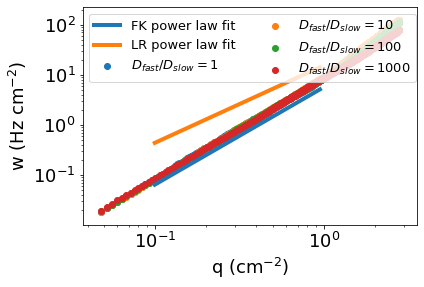

In [194]:
#plot fits for full model
m_fk=1.945;#+-0.030; B_fk=2.441+-0.051
m_lr=1.544;#+-0.034; B_lr=5.870+-0.137
M_fk=5.67;#+-0.39 Hz*cm^{2(m-1)}
M_lr=15.37;#+-1.57 Hz*cm^{2(m-1)}
# RMSE_fk=0.1252 Hz/cm^2
# RMSE_lr=0.0974 Hz/cm^2
# R^2=0.997 (FK)
# R^2=0.994 (LR)

xv=np.arange(0.1,1.,.05)
yv_fk=M_fk*(xv)**m_fk
yv_lr=M_lr*(xv)**m_lr

yscale=10**3
fontsize=18
# plt.xlim([0.1,1])
# plt.ylim([1e-1,15])
plt.yscale('log')
plt.xscale('log')
plt.plot(xv,yv_fk,label='FK power law fit',zorder=3,lw=4)
plt.plot(xv,yv_lr,label='LR power law fit',zorder=3,lw=4)

#plot data
r=5.;D=2.;L=L_values[-1]
energy_gap=0
for Dratio in Dratio_values:
    #query the DataFrame
    query =(df.temperature_energy==temperature_energy_values[0])&(df.Dt_over_dt==Dt_over_dt_values[0])
    query&=df.r==r
    query&=df.L==L
    query&=df.D==D
    query&=df.Dratio==Dratio
    query&=df.energy_gap==energy_gap
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
#     dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
    dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit
    x_values=dg.q.values
    y_values=dg.w.values

    plt.scatter(x_values,y_values,label=r'$D_{fast}/D_{slow} = $'+f"{Dratio:.0f}")#,c=c_values)

# plt.title(u'comparison to simulation\nwith two hybrid modes',fontsize=fontsize)
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-5,ncol=2,loc='upper left')
plt.show()

In [195]:
#TODO: plot m+-Delta_m versus energy gap for LR and FK model
#plot data
dr_lst=[];m_lst=[];Dm_lst=[];Rsq_lst=[]
#plot data
# r=5.;D=2.;L=L_values[-1]
# energy_gap=1
for Dratio in Dratio_values:
    try:
        #query the DataFrame
        query =(df.temperature_energy==temperature_energy_values[0])&(df.Dt_over_dt==Dt_over_dt_values[0])
        query&=df.r==r
        query&=df.L==L
        query&=df.D==D
        query&=df.Dratio==Dratio
        query&=df.energy_gap==energy_gap
        dff=df[query]
        kappa_values=np.array(sorted(set(dff.kappa.values)))
        #dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
        dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit
        x_values=dg.q.values
        y_values=dg.w.values

        q_min=0.1;q_max=.4
        boo=(x_values>q_min)&(x_values<q_max)
        x=x_values[boo]
        y=y_values[boo]

        # print_fit_power_law(x,y)
        B,Delta_B,m,Delta_m,Rsq=fit_power_law(x,y)
        rmse=compute_power_rmse(x,y,m,B)
        M, Delta_M= comp_power_scale(B,Delta_B,m,Delta_m)
    #     print(f"m={m:.3f}+-{Delta_m:.3f}; B={B:.3f}+-{Delta_B:.3f}")
    #     print(f"M=B**m={M:.2f}+-{Delta_M:.2f} Hz*cm^{{2(m-1)}}")
    #     print(f"RMSE={rmse:.4f} Hz/cm^2")
    #     print(f"R^2={Rsq:.3f}")

        dr_lst.append(Dratio)
        m_lst.append(m)
        Dm_lst.append(Delta_m)
        Rsq_lst.append(Rsq)
    except AssertionError as e:
        pass
print(Rsq_lst)

[0.999587598209781, 0.9996362643233341, 0.9997365896330023, 0.999641813325951]


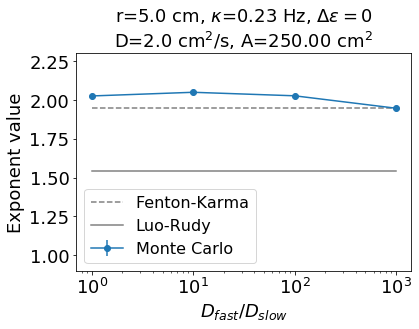

considering 0.1<q<0.4


In [196]:
m_fk=1.945#1.858;#+-0.027; B_fk=2.464+-0.030<br>
m_lr=1.544#1.638;#+-0.017; B_fk=5.588+-0.067
plt.errorbar(dr_lst, m_lst, yerr=Dm_lst, fmt='-o',label='Monte Carlo')
plt.plot(dr_lst, m_fk+0.*np.array(dr_lst), '--',c='gray',label='Fenton-Karma')
plt.plot(dr_lst, m_lr+0.*np.array(dr_lst), '-',c='gray',label='Luo-Rudy')

# plt.scatter(Dtdt_lst,m_lst,marker='^')
# plt.xscale('log')
title=f"r={r:.1f} cm, "+r"$\kappa$="+f"{kappa:.2f} Hz, "+r"$\Delta \epsilon=$"+f"{energy_gap}\nD={D} cm"+r"$^2$/s"+f", A={L**2:.2f} cm"+r"$^2$"
plt.title(title,fontsize=fontsize)
plt.xlabel(r'$D_{fast}/D_{slow}$',fontsize=fontsize)
plt.ylabel('Exponent value',fontsize=fontsize)
plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
# plt.xlim([10,50])
plt.ylim([0.9,2.3])
# plt.grid('on')
plt.legend(fontsize=fontsize-2)
plt.show()
# print("considering 20<N<50 spiral tips")
# print("considering N<20 spiral tips")
print(f"considering {q_min}<q<{q_max}")

In [ ]:
beep(20)